# Let's Cluster some Credit Cards!
In this notebook we will try to cluster some credit cards. We will go through preprocessing, choose a model and train it on our data, and then evaluate our outcomes.

The dataset you will use is `Credit Card Dataset.csv`

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Libraries

In [43]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# EDA
Explore the Dataset Perform initial exploration of your dataset. Understand the features and the distribution of data.

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Credit Card Dataset.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [5]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [35]:
df = df.drop('CUST_ID' , axis=1)

# Preprocessing
1. Remove the outliers
2. Impute missing data
3. Scale the data
4. Reduce dimentions using PCA

In [ ]:
# 1. Remove the outliers:

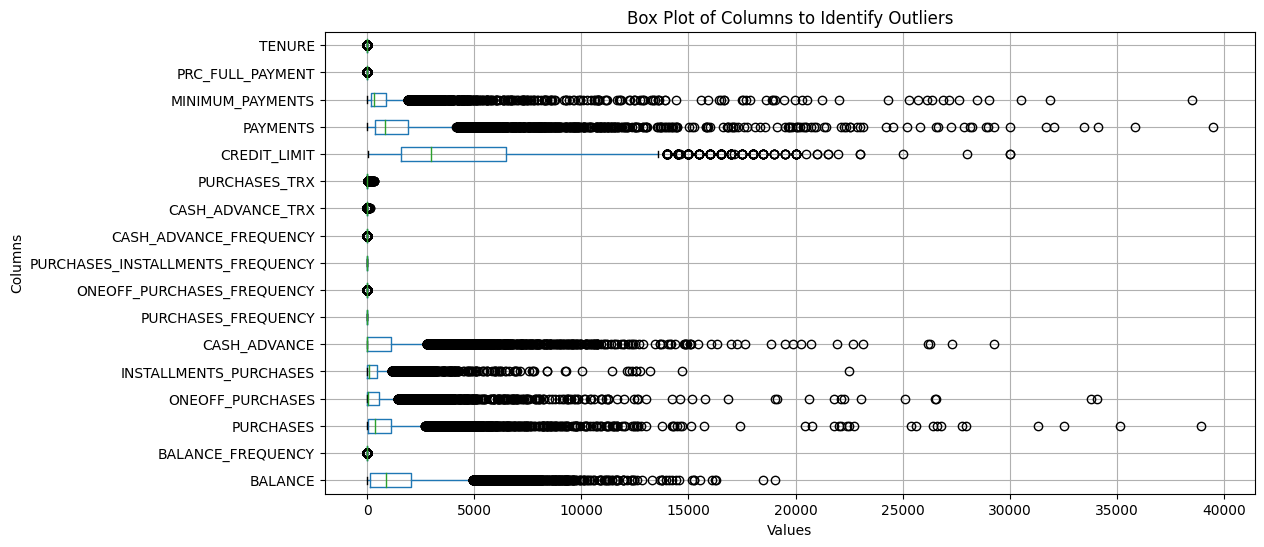

In [36]:
# Create a box plot to visualize outliers by column
plt.figure(figsize=(12, 6))
df.boxplot(vert=False)
plt.title('Box Plot of Columns to Identify Outliers')
plt.xlabel('Values')
plt.ylabel('Columns')
plt.show()

### All values ​​of 40000 or greater are outliers, and are in these columns:

- MINIMUM_PAYMENTS
- PAYMENTS
- CASH_ADVANCE
- ONEOFF_PURCHASES
- PURCHASES

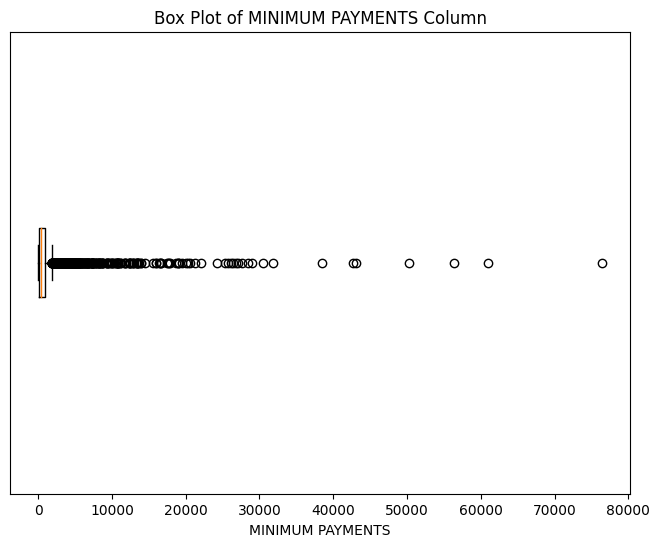

In [27]:
# df['MINIMUM_PAYMENTS'].value_counts()

# Create a box plot for the 'MINIMUM_PAYMENTS' column
plt.figure(figsize=(8, 6))
plt.boxplot(df['MINIMUM_PAYMENTS'], vert=False)
plt.title('Box Plot of MINIMUM PAYMENTS Column')
plt.xlabel('MINIMUM PAYMENTS')
plt.yticks([])
plt.show()

In [31]:
# List of columns to filter out values greater than or equal to 40000
columns_to_filter = ['MINIMUM_PAYMENTS', 'PAYMENTS', 'CASH_ADVANCE', 'ONEOFF_PURCHASES', 'PURCHASES']

# Remove values greater than or equal to 40000 in the specified columns
for column in columns_to_filter:
    df = df[df[column] < 40000]

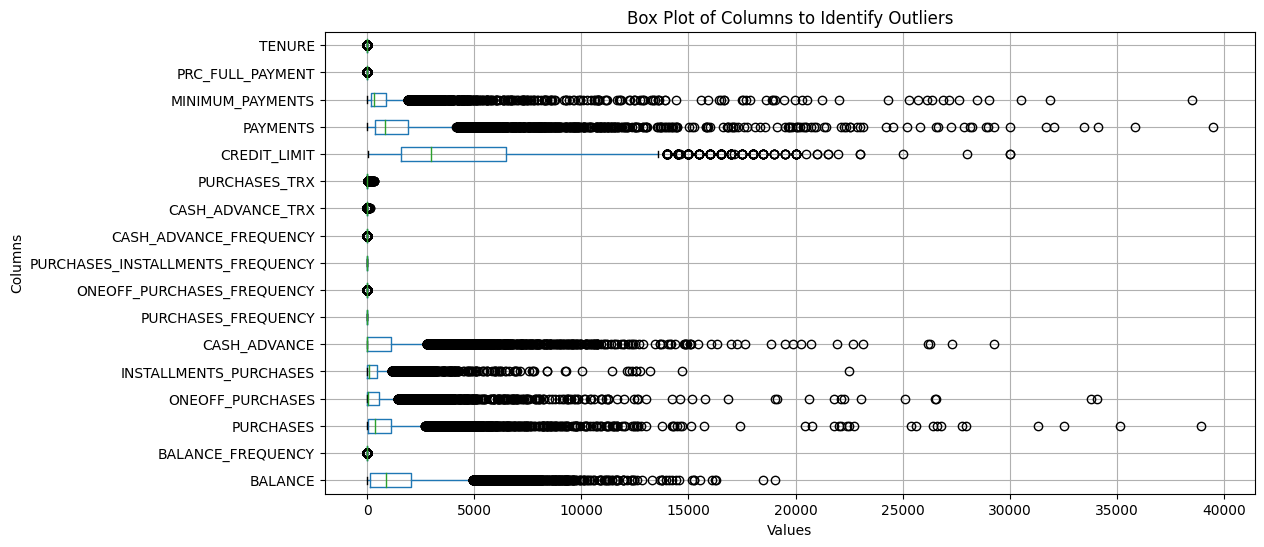

In [29]:
# Create a box plot to visualize dataset without outliers
plt.figure(figsize=(12, 6))
df.boxplot(vert=False)
plt.title('Box Plot of Columns to Identify Outliers')
plt.xlabel('Values')
plt.ylabel('Columns')
plt.show()

In [37]:
# 2. Impute missing data:
df.isnull().sum()

,0
BALANCE,0
BALANCE_FREQUENCY,0
PURCHASES,0
ONEOFF_PURCHASES,0
INSTALLMENTS_PURCHASES,0
CASH_ADVANCE,0
PURCHASES_FREQUENCY,0
ONEOFF_PURCHASES_FREQUENCY,0
PURCHASES_INSTALLMENTS_FREQUENCY,0
CASH_ADVANCE_FREQUENCY,0


In [38]:
df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].mean(), inplace=True)
df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].mean(), inplace=True)

In [39]:
df.isnull().sum().sum()

0

In [42]:
# 3. Scale the data:
scaler = StandardScaler()
# scaled_data = scaler.fit_transform(df)

# اخترت اللاين اللي تحت عن اللي فوق عشان أقدر أتعامل مع الداتا
scaled_data = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)

scaled_data.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.733220,-0.249047,-0.449882,-0.381980,-0.353489,-0.477404,-0.806179,-0.678719,-0.706867,-0.675736,-0.482515,-0.515774,-0.961998,-0.556080,-0.374562,-0.525646,0.360953
1,0.796591,0.134658,-0.498036,-0.381980,-0.461503,2.680431,-1.221530,-0.678719,-0.916622,0.574252,0.113658,-0.597441,0.695209,0.886034,0.134927,0.234079,0.360953
2,0.454335,0.518362,-0.107766,0.127783,-0.461503,-0.477404,1.270572,2.674891,-0.916622,-0.675736,-0.482515,-0.107442,0.833309,-0.400727,-0.108151,-0.525646,0.360953
3,0.053453,-1.016457,0.258608,0.606333,-0.461503,-0.376542,-1.013855,-0.399252,-0.916622,-0.259075,-0.333472,-0.556608,0.833309,-0.630677,0.021250,-0.525646,0.360953
4,-0.357337,0.518362,-0.489960,-0.371431,-0.461503,-0.477404,-1.013855,-0.399252,-0.916622,-0.675736,-0.482515,-0.556608,-0.906758,-0.379927,-0.317060,-0.525646,0.360953


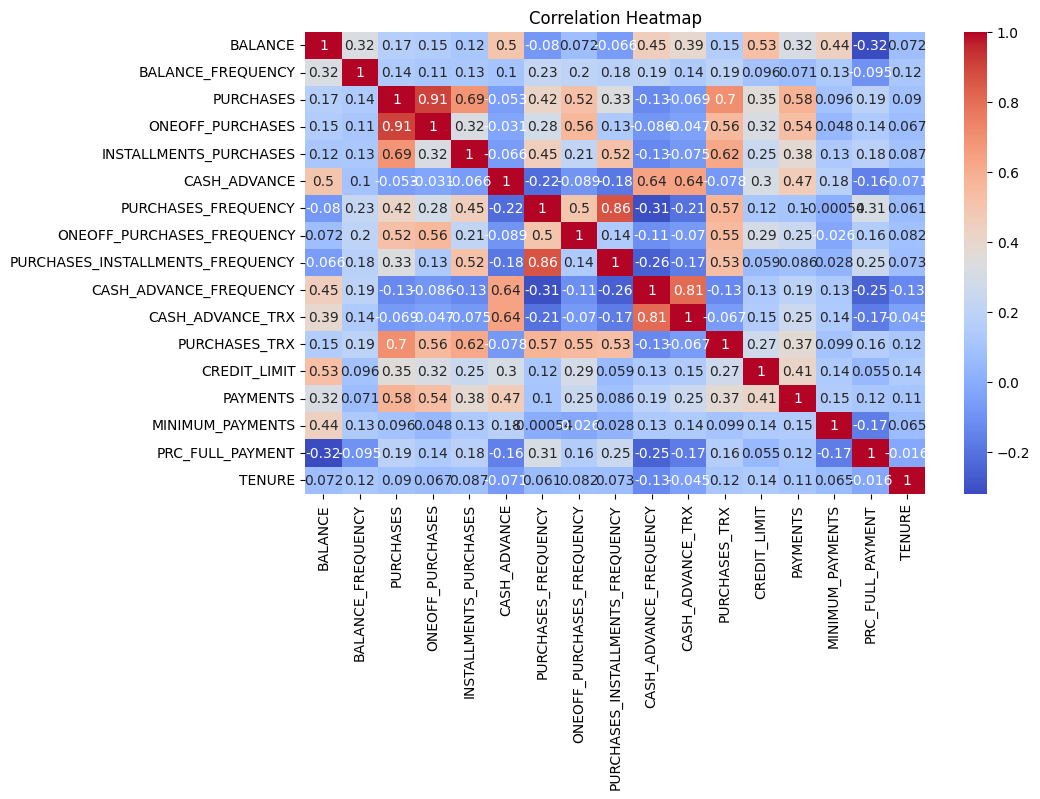

In [44]:
plt.figure(figsize=(10, 6))
sns.heatmap(scaled_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

#### Dimention Reduction using PCA
K-means, DBSCAN and agglomerative clustering, all use the Euclidean distance, which starts to lose its meaning when the number of dimensions starts increasing. so, before using these methods, we have to reduce the number of dimensions. We are going to use PCA, which is by far the most popular dimensionality reduction algorithm.

Please set the parameter `n_components` equals to 0.9, which means that the PCA will automatically produce enough PCs that will preserve 90% of variance in the dataset.

In [45]:
# 4. Reduce dimentions using PCA:

pca = PCA(n_components=0.9)
pca_data = pca.fit_transform(scaled_data)

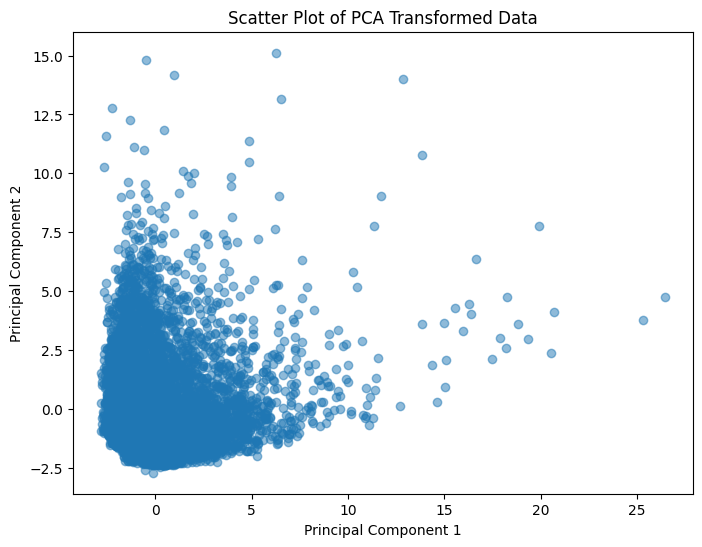

In [48]:
# Create a scatter plot of the PCA-transformed data
plt.figure(figsize=(8, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], alpha=0.5)
plt.title('Scatter Plot of PCA Transformed Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Train the Model
Now that we have done the preprocessing step, we can perform K-means clustering on the data.

* Find the `n_clusters` parameter using the elbow method.
* Train the model.

In [49]:
# 1. Find the n_clusters parameter using the Elbow Method

inertia = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
  kmeans.fit(pca_data)
  inertia.append(kmeans.inertia_)

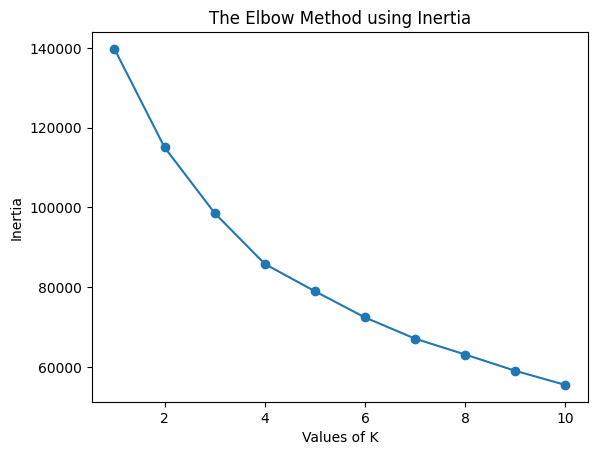

In [52]:
# Create a scatter plot of the Elbow Method

# plt.figure(figsize=(8,6))
plt.plot(range(1,11), inertia, marker='o')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

In [66]:
# 2. Train the model:

n_clusters = 8 # Choose the optimal n_clusters based on the elbow method
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
kmeans.fit(pca_data)
labels = kmeans.labels_
centers = kmeans.cluster_centers_

# A
print("Cluster Centers:", centers)
print("Cluster Labels:", labels)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Cluster Centers: [[ 6.74997080e-01 -1.23415487e+00 -1.20482126e+00 -3.59608259e-01
   3.12343106e-01 -2.76944827e-01  1.57518819e-01  1.58796515e-03
   1.30297291e-01 -2.75413236e-01]
 [-1.22389726e+00 -1.14501436e+00  1.32698649e+00 -5.87607281e-02
   1.18062096e+00 -1.84518390e-01 -3.31505414e-02 -3.41064771e-01
  -8.84823847e-01  1.81924739e-01]
 [ 5.86695924e+00  6.76063086e-01  3.00328406e-01  4.23664564e-01
   3.06830307e-01  6.38464093e-01  3.73679603e-01 -3.35950774e-01
   3.86924265e-02  5.64899803e-01]
 [-1.29704648e+00  2.38478198e-01  1.14258666e-01  6.77753001e-01
  -3.05613234e-01 -6.71774417e-02  3.91733391e-01  1.20814900e-01
   4.13226021e-01  6.79793034e-02]
 [-3.97685027e-01  4.01428892e+00 -3.89639971e-01 -4.69671541e-01
   1.64535401e-01 -4.43385658e-01 -2.93899689e-01  4.53394076e-02
  -1.86023111e-01  2.21273950e-03]
 [ 1.99973341e+00 -6.11803635e-01  3.06098105e-01  2.23479512e-01
  -1.16661870e+00 -3.89613263e-01 -6.32471035e-01  1.86574825e-01
  -4.90572870e-0

# Evaluate the Model

In [67]:
# evaluation the model
from sklearn import metrics
sc = metrics.silhouette_score(pca_data, labels)
print("Silhouette Coefficient:%0.2f" % sc)

Silhouette Coefficient:0.24


# Plot the data points with their predicted cluster center

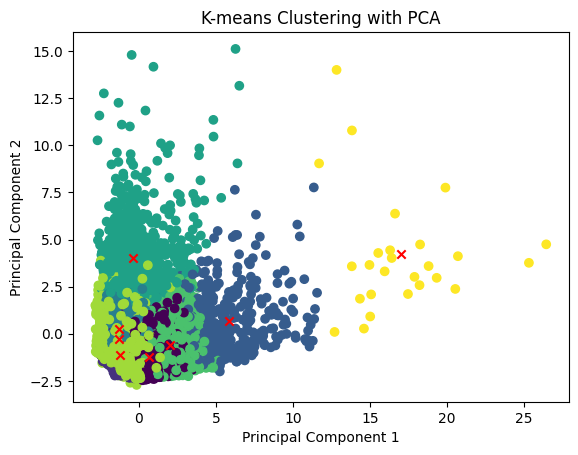

In [68]:
# Step 5: Plot the data points with their predicted cluster center
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=labels, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='x')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-means Clustering with PCA')
plt.show()